In [2]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","FEYE", "FB","BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FEYE: No tim

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FEYE,FB,BRK-B,MSFT
Date,,,,,,,,,,,,,,,,,
2021-10-20 00:00:00-04:00,452.347168,148.182465,142.414993,116.389999,46.130001,443.628998,625.140015,216.169998,143.164078,65.800003,395.319122,60.599300,156.484467,NaN,NaN,287.489990,304.000092
2021-10-21 00:00:00-04:00,461.599670,148.400879,142.780502,119.330002,45.427502,444.786102,653.159973,214.339996,143.958328,65.400002,395.028351,59.498360,160.168182,NaN,NaN,286.820007,307.312927
2021-10-22 00:00:00-04:00,458.019012,147.616562,138.625000,119.820000,42.450001,444.325195,664.780029,212.970001,145.458603,62.240002,401.550903,59.906467,161.452057,NaN,NaN,289.239990,305.730682
2021-10-25 00:00:00-04:00,459.903046,147.566940,138.772995,122.360001,43.492500,446.708069,671.659973,212.869995,147.145203,62.110001,401.967651,61.073845,162.182877,NaN,NaN,290.260010,304.712128
2021-10-26 00:00:00-04:00,459.449280,148.242035,139.671997,122.930000,44.459999,447.110107,668.520020,209.809998,145.860641,61.430000,404.739532,62.487980,161.758194,NaN,NaN,290.850006,306.670135


<AxesSubplot: >

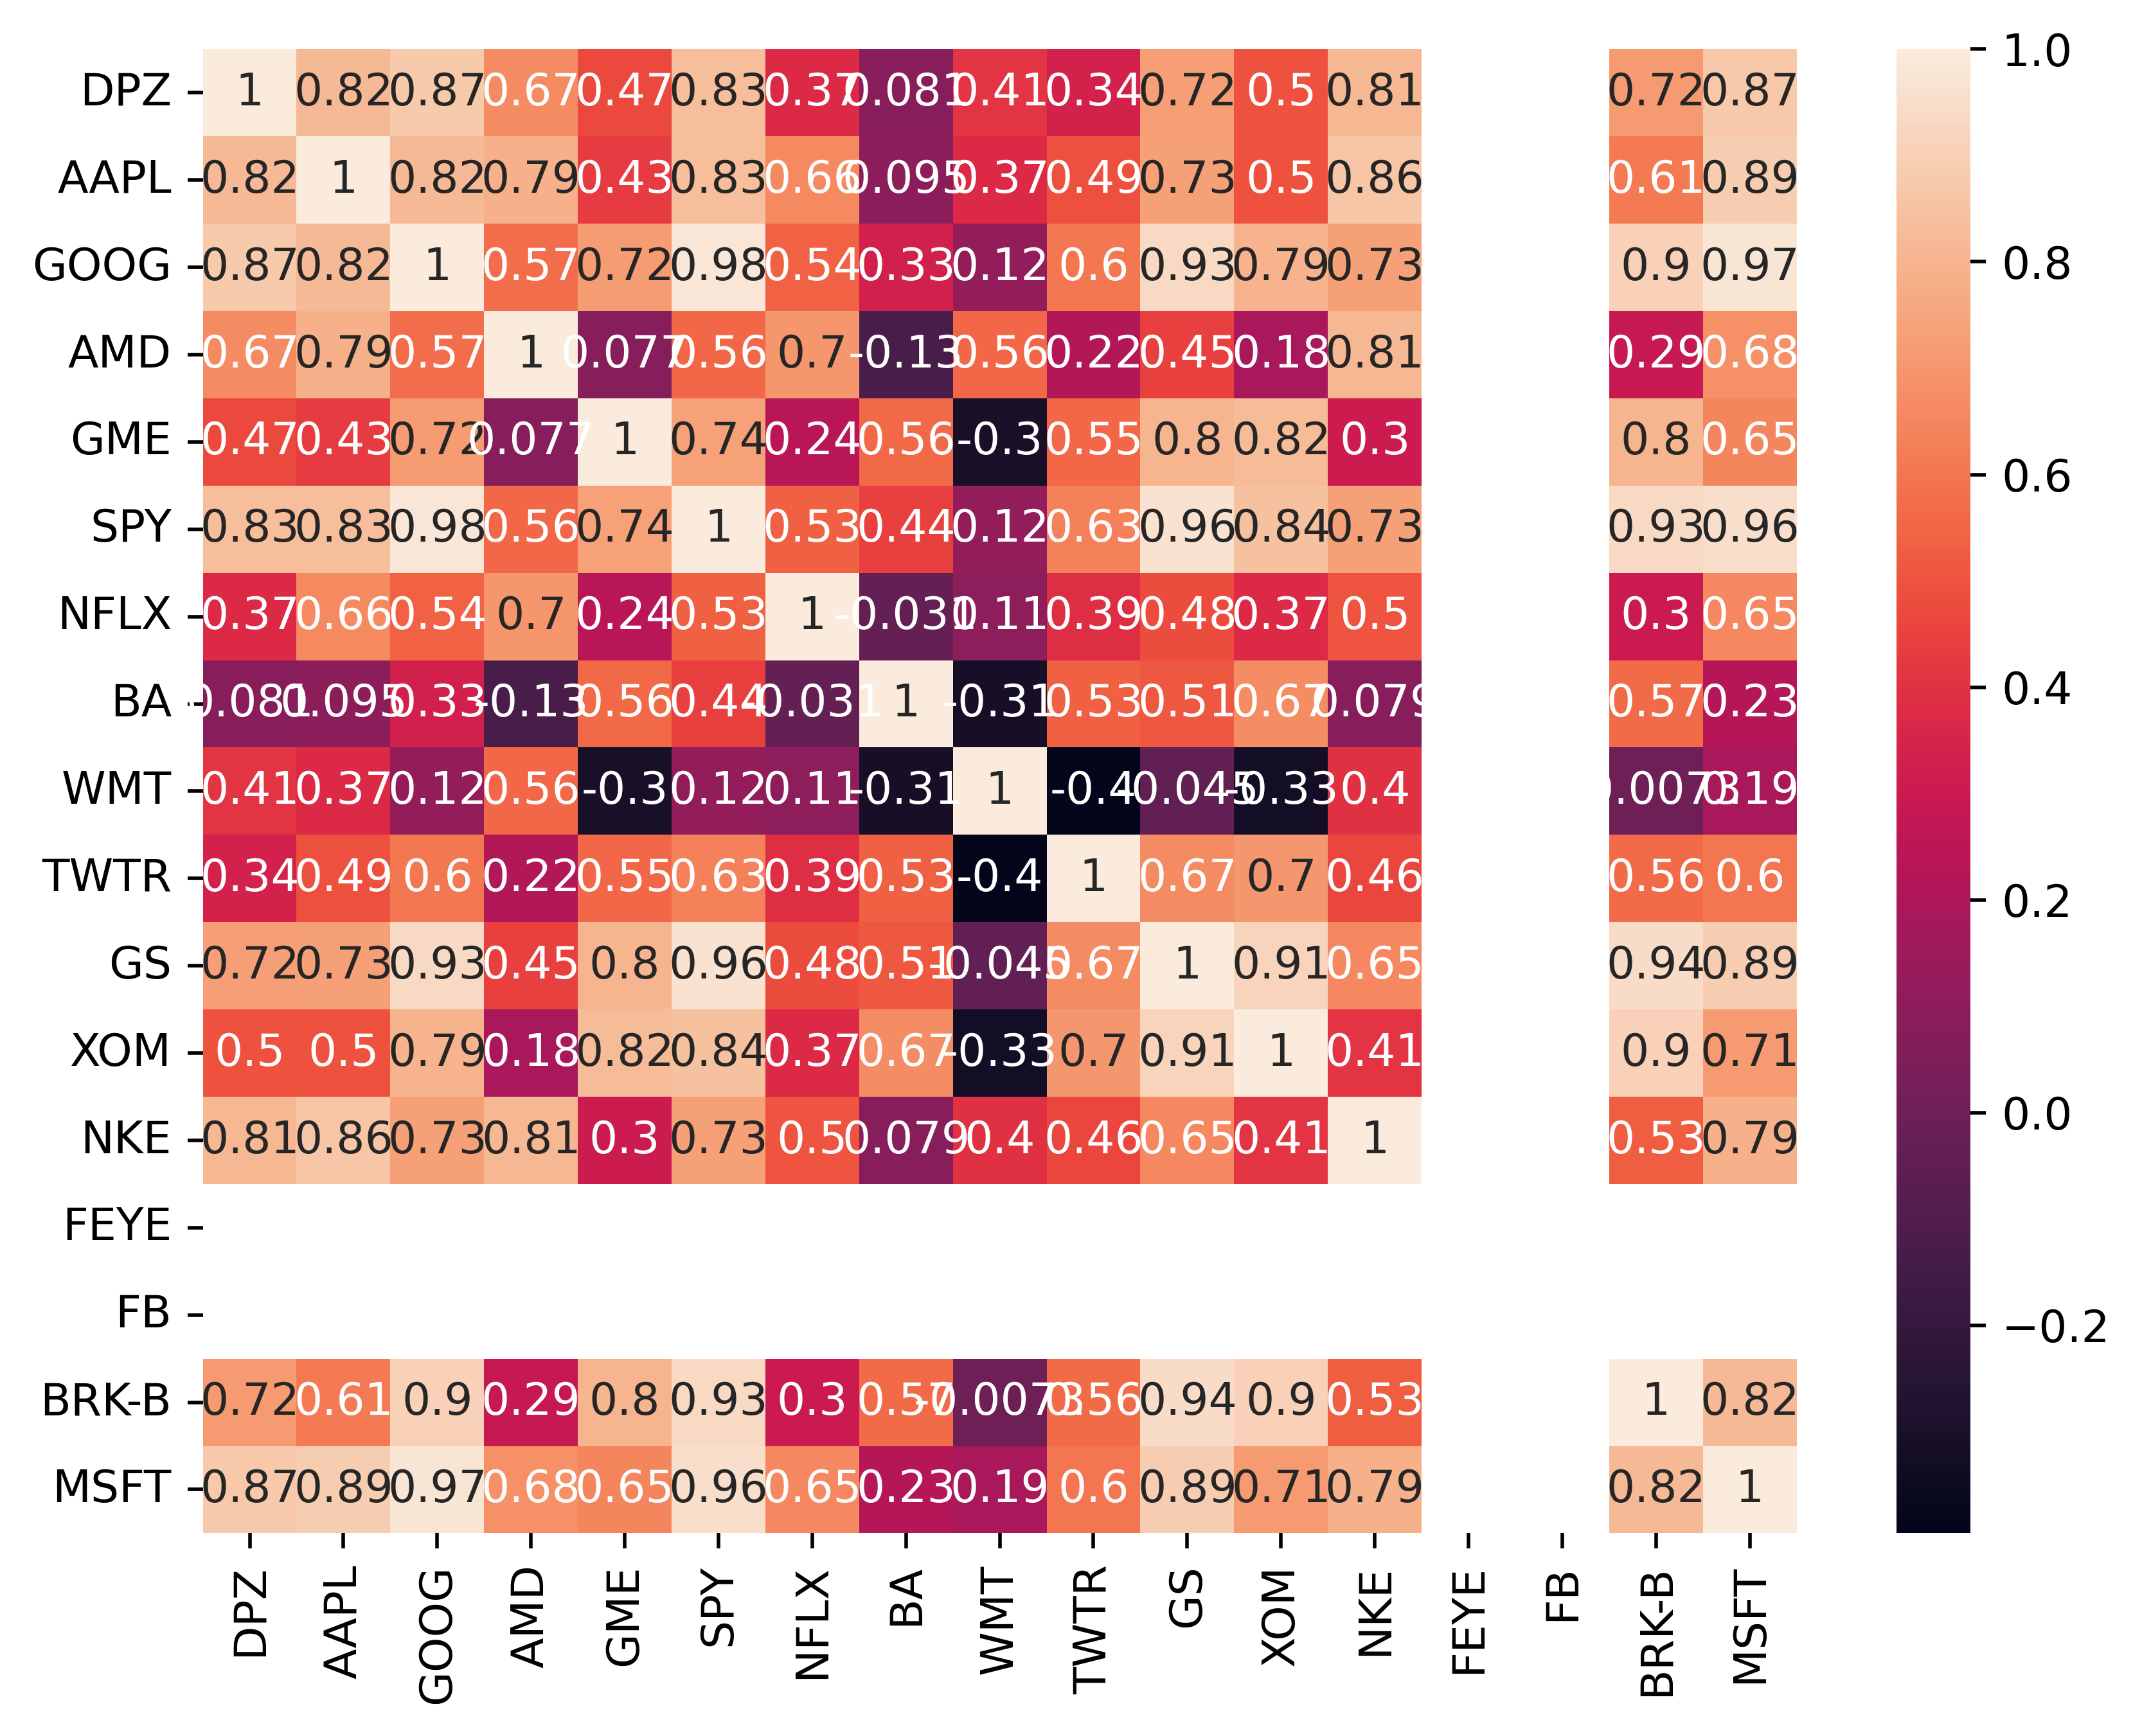

In [3]:
import seaborn as sn
from matplotlib.pyplot import figure

corr_matrix = d.corr()
figure(figsize=(8,6), dpi=500)
sn.heatmap(corr_matrix, annot=True)


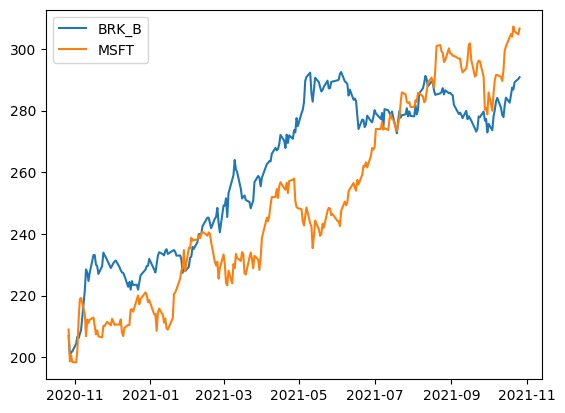

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv("USDCHF.csv")
BRK_B = d["BRK-B"]
GS = d["MSFT"]

plt.plot(BRK_B, label= "BRK_B")
plt.plot(GS, label="MSFT")
plt.legend()
plt.show()
# df["ts"] = pd.to_datetime(df["Unnamed: 0"]) 
# df = df.set_index("ts")
# df = df.resample("H").last()
# df = df.dropna()


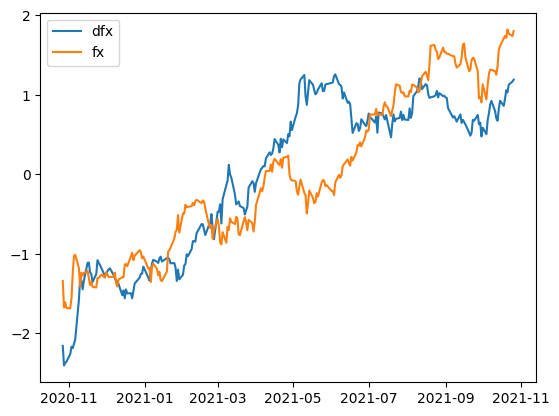

In [8]:

from sklearn.preprocessing import StandardScaler


x1=BRK_B
x2=GS



plt.plot((x1 - x1.mean())/x1.std(), label="dfx")
plt.plot((x2 -x2.mean())/x2.std(), label="fx")
plt.legend()
plt.show()

ADF Statistic: -16.192591
p-value: 0.000000


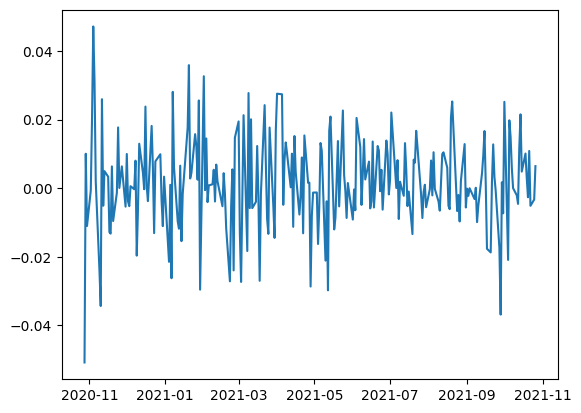

In [9]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(series): 
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    
    if result[1] > 0.05: # non-stationary
        return False
    else:                # stationary
        return True

# stationarity_test(x1)
# stationarity_test(x2)
# stationarity_test(x1 - x2)
# stationarity_test(x1/x2)
stationarity_test((np.log(x2/x2.shift(1))).dropna())

plt.plot((np.log(x2/x2.shift(1))).dropna())





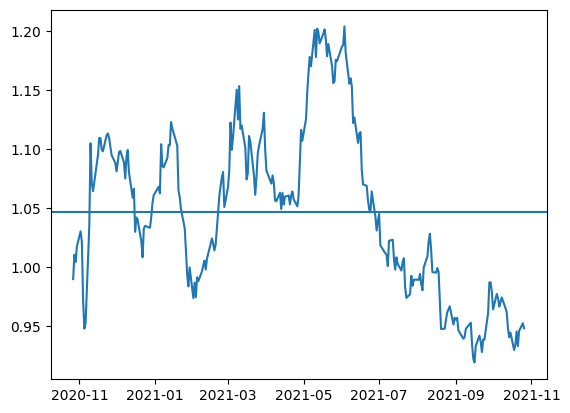

In [14]:

plt.plot(x1/x2)
plt.axhline((x1/x2).mean())